In [1]:
import torch

In [2]:
from torch import nn


In [16]:
a = [[1,0,1,2],[2,1,1,2],[1,1,3,3]]

logits = torch.tensor(a, dtype=float)

In [17]:
logits.size()

torch.Size([3, 4])

In [26]:
softmax = nn.Softmax(dim=0)
pred_prob = softmax(logits)

In [25]:
pred_prob

tensor([[0.2119, 0.1554, 0.1065, 0.2119],
        [0.5761, 0.4223, 0.1065, 0.2119],
        [0.2119, 0.4223, 0.7870, 0.5761]], dtype=torch.float64)

In [23]:
pred_prob.argmax(1)

tensor([0, 0, 2])

Sample Neural network


In [34]:
class SampleNeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_stack = nn.Sequential(
            nn.Linear(in_features=28*28, out_features=512),
            nn.ReLU(),
            nn.Linear(in_features=512, out_features=512),
            nn.ReLU(),
            nn.Linear(in_features=512, out_features=10),

        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_stack(x)
        return logits
    

    def predict(self, x):
        logits = self.forward(x)
        softmax = nn.Softmax(dim=1)
        pred_prob = softmax(logits)
        return pred_prob.argmax(1)
    

    



In [35]:
model = SampleNeuralNetwork()
if torch.cuda.is_available():
    device = 'cuda'
else:
    device = 'cpu'

model.to(device=device)

SampleNeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)

In [58]:
X = torch.rand(1,28,28, device=device)
logits = model(X)
softmax = nn.Softmax(dim=1)
pred_prob = softmax(logits)
predicted_class = pred_prob.argmax(1)

In [59]:
print(f"Predicted class {predicted_class}")

Predicted class tensor([6], device='cuda:0')


In [57]:
import matplotlib.pyplot as plt

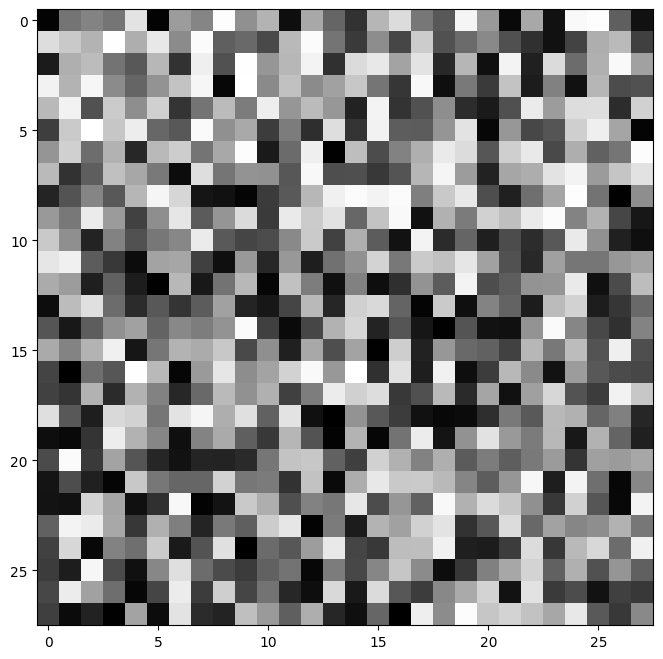

In [54]:
figure  = plt.figure(figsize=(8,8))
img = torch.rand(1,28,28)
plt.imshow(img.squeeze(), cmap='gray' )
plt.show()

In [64]:
for name, param in model.named_parameters():
    print(f"{name}  Param {param.size()}")

linear_stack.0.weight  Param torch.Size([512, 784])
linear_stack.0.bias  Param torch.Size([512])
linear_stack.2.weight  Param torch.Size([512, 512])
linear_stack.2.bias  Param torch.Size([512])
linear_stack.4.weight  Param torch.Size([10, 512])
linear_stack.4.bias  Param torch.Size([10])
